In [15]:
import pandas as pd
import numpy as np
from random import random
import matplotlib.pyplot as plt
from scipy.stats import norm

In [16]:
hist = pd.read_csv("BTC-USD.csv")
hist.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-08-17,45936.457031,47139.570313,44512.417969,44695.359375,44695.359375,33451362600
1,2021-08-18,44686.750000,45952.062500,44364.027344,44801.187500,44801.187500,32194123075
2,2021-08-19,44741.882813,46970.761719,43998.316406,46717.578125,46717.578125,37204312299
3,2021-08-20,46723.121094,49342.152344,46650.707031,49339.175781,49339.175781,34706867452
4,2021-08-21,49327.074219,49717.019531,48312.199219,48905.492188,48905.492188,40585205312


In [17]:
hist = hist[['Close']]
hist.head()

,Close
0,44695.359375
1,44801.187500
2,46717.578125
3,49339.175781
4,48905.492188


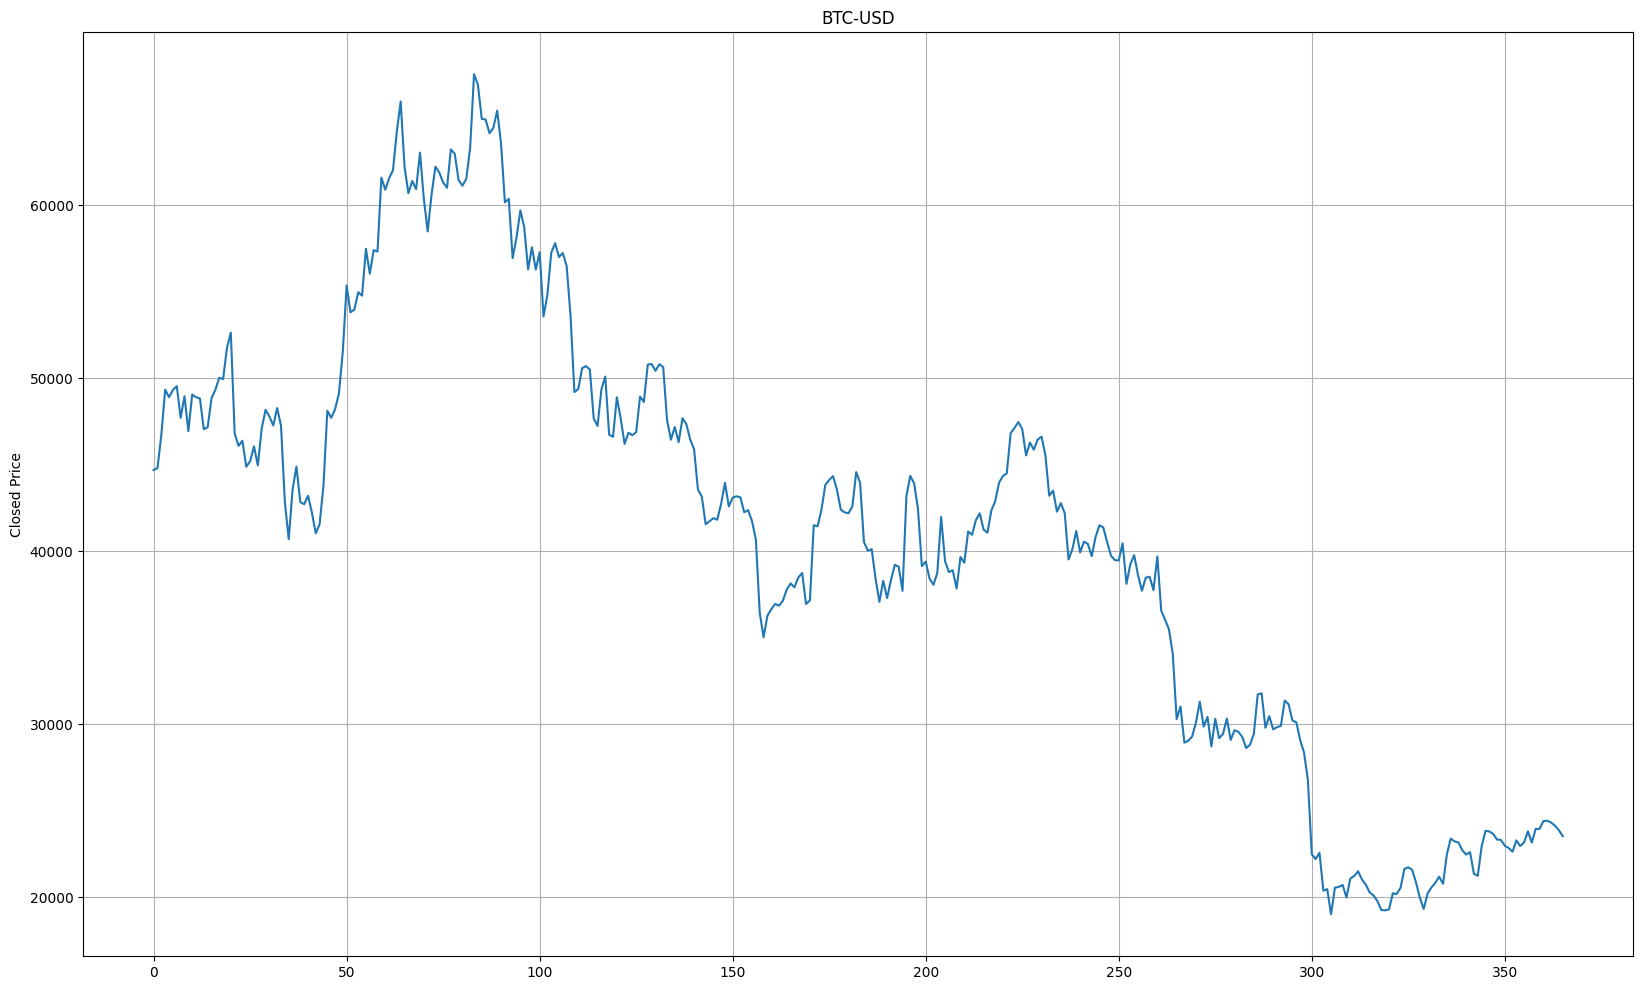

In [18]:
hist['Close'].plot(title="BTC-USD", ylabel="Closed Price", figsize=[20, 12])
plt.grid()

In [19]:
days = [i for i in range(1, len(hist['Close'])+1)]
price_orig = hist['Close'].tolist()
change = hist['Close'].pct_change().tolist()
change = change[1:]

mean = np.mean(change)
std_dev = np.std(change)
print('\nAverage Percentage Change: ' + str(round(mean*100, 2)) + '%')
print('Percentage Change Standart Deviation: ' + str(round(std_dev*100, 2)) + '%')


Average Percentage Change: -0.11%
Percentage Change Standart Deviation: 3.5%


In [20]:
start_date = '2021-08-17'
end_date = '2022-08-17'

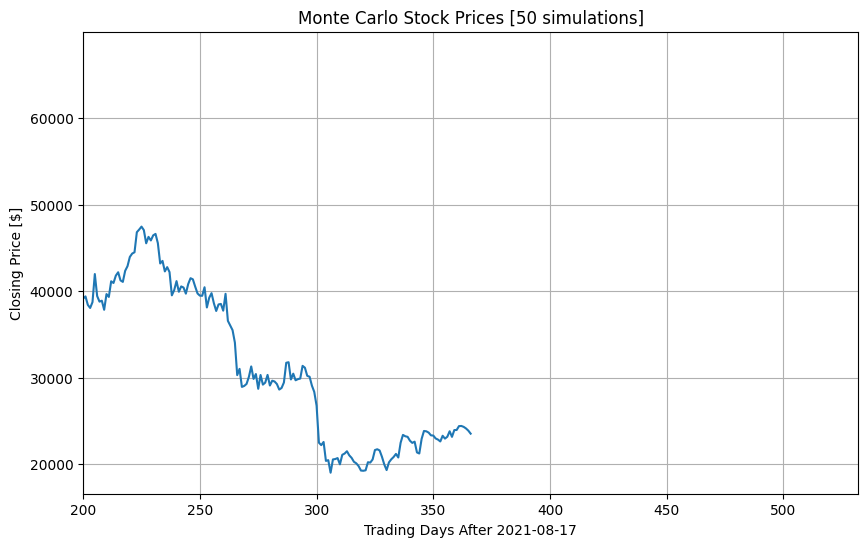

In [21]:
# Simülasyon Numbers and Prediction period
simulations = 50 # make 200 prediction, much simulation sense a good results
days_to_sim = 1*166 # process numbers for one year

fig = plt.figure(figsize=[10, 6])
plt.plot(days, price_orig)
plt.title("Monte Carlo Stock Prices [" + str(simulations) + " simulations]")
plt.xlabel("Trading Days After " + start_date)
plt.ylabel("Closing Price [$]")
plt.xlim([200, len(days)+days_to_sim])
plt.grid()

close_end = []
above_close = []

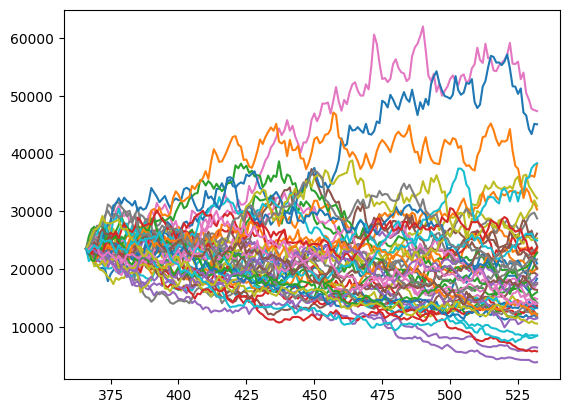

In [22]:
for i in range(simulations):
    num_days = [days[-1]]
    close_price = [hist.iloc[-1, 0]]

    for j in range(days_to_sim):
        num_days.append(num_days[-1]+1)
        perc_change = norm.ppf(random(), loc=mean, scale=std_dev)
        close_price.append(close_price[-1]*(1+perc_change))

    if close_price[-1] > price_orig[-1]:
        above_close.append(1)
    else:
        above_close.append(0)

    close_end.append(close_price[-1])
    plt.plot(num_days, close_price)

In [23]:
average_closing_price = sum(close_end)/simulations
average_perc_change = (average_closing_price-price_orig[-1])/price_orig[-1]
probability_of_increase = sum(above_close)/simulations
print('\nPrediction for BTC close price after 1 year =  '  + ' ' + str(round(average_closing_price, 2)))
print('Expected percentage change after 1 year: ' + str(round(average_perc_change*100, 2)) + '%')
print('Probability of increasing percentage to BTC-USD for after one year : ' + str(round(probability_of_increase*100, 2)) + '%')


Prediction for BTC close price after 1 year =   19557.66
Expected percentage change after 1 year: -16.89%
Probability of increasing percentage to BTC-USD for after one year : 28.0%
